In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [8]:
import eleanor

In [9]:
coords = (47.729, 9.8238)
#star = eleanor.Source(sector=4, coords = coords)


INFO: Found cached file /home/david/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-3-cal-0510-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-3-cal-0510-0322_tess_v2_bkg.fits with expected size 65286720. [astroquery.query]
INFO: Found cached file /home/david/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0004-1-3-cal-0510-0322_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0004-1-3-cal-0510-0322_tess_v2_pc.fits with expected size 130665600. [astroquery.query]


In [10]:
#data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)

Set MJD-OBS to 58410.421797 from DATE-OBS.
Set DATE-BEG to '2018-10-19T10:08:32.417' from MJD-BEG'. [astropy.wcs.wcs]
/home/david/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.

/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/anaconda3/lib/python3.7/site-packages/tensorboard/co

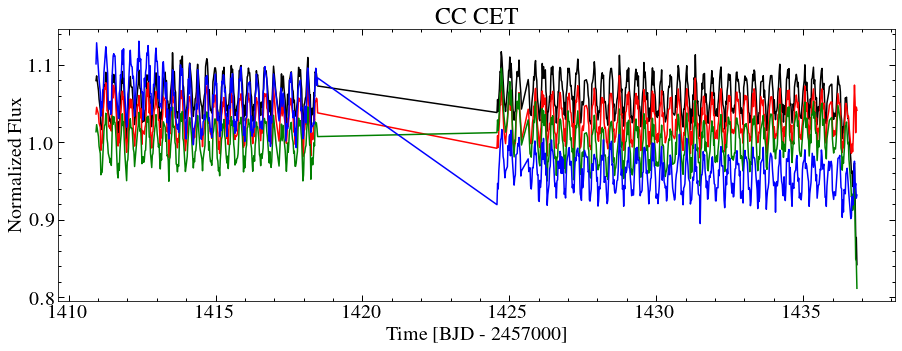

In [11]:
"""plt.figure(figsize=(15,5))

q = data.quality == 0

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k')
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r')
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g')
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.02, 'b')
plt.ylabel('Normalized Flux')
plt.xlabel('Time [BJD - 2457000]')
plt.title('CC CET');"""

In [12]:
#data.save(directory='eleanor_files/')

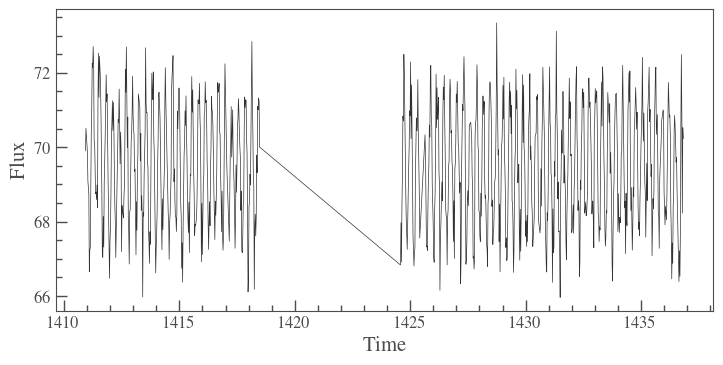

In [41]:
data = fits.getdata('eleanor_files/hlsp_eleanor_tess_ffi_tic337219837_s04_tess_v1.0.0_lc.fits')
q = (data['QUALITY'] == 0)
lc = lk.LightCurve(time = data['Time'][q], flux= data['CORR_FLUX'][q], flux_err = data['FLUX_ERR'][q])

#lc = data.to_lightkurve()
lc.plot()

6.883503232597658 h


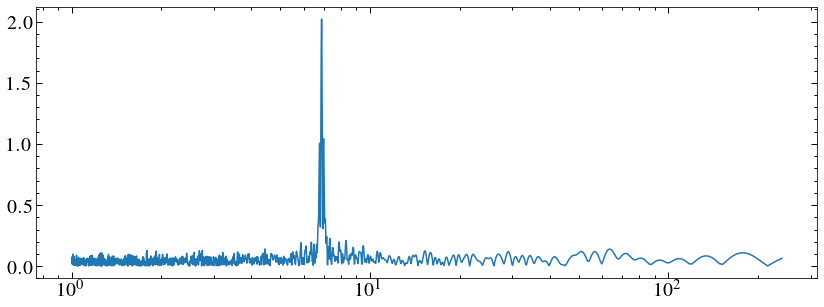

In [42]:
pg = lc.to_periodogram(oversample_factor=10,minimum_period=1*u.hour, maximum_period=10*u.day)
plt.plot(pg.period.to(u.hour), pg.power)
plt.xscale('log')
print(pg.period_at_max_power.to(u.hour))

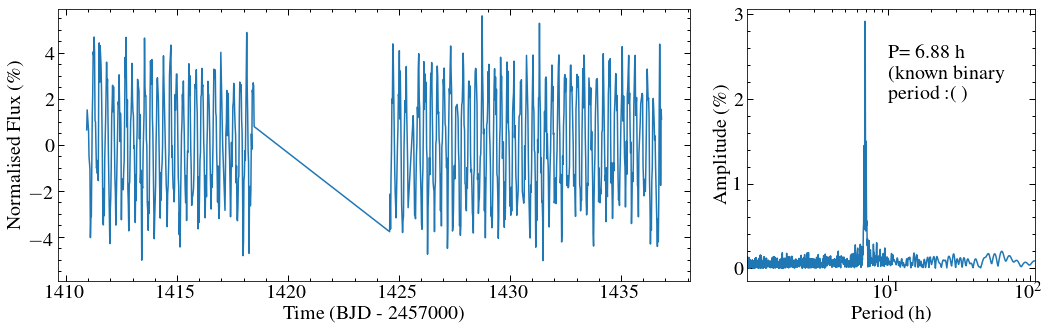

In [51]:
lc1 = lk.LightCurve(time = lc.time, flux= (lc.flux/np.median(lc.flux))-1, flux_err = lc.flux_err/np.median(lc.flux) )
pg1 = lc1.to_periodogram(oversample_factor=10,minimum_period=1*u.hour, maximum_period=10*u.day)
    
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, figure=fig)

plt.subplot(gs[:2])
plt.plot(lc1.time, (lc1.flux)*100)
plt.ylabel('Normalised Flux (\%)', size=20)
plt.xlabel('Time (BJD - 2457000)', size=20)
#plt.ylim(0.93, 1.07)
plt.ylim(-5.9, 5.9)

plt.subplot(gs[2:])
plt.plot(pg1.period.to(u.hour), pg1.power*100)
plt.xscale('log')
plt.ylabel('Amplitude (\%)', size=20)
plt.xlabel('Period (h)', size=20)
plt.xlim(1.01, 109)
plt.annotate('P={0:10.2f}\n(known binary \n period :( )'.format(pg1.period_at_max_power.to(u.hour)), (10, 2.))
plt.tight_layout()
#plt.savefig('plots/cc_cet_tess.png')

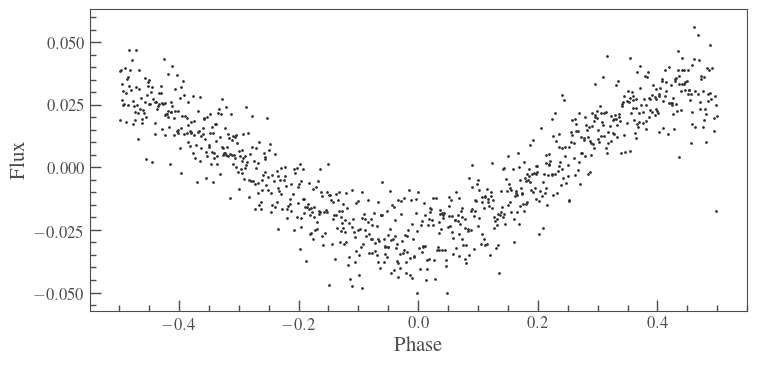

In [53]:
#lc2 = lc1.fold(pg1.period_at_max_power)
lc1.fold(pg1.period_at_max_power).scatter()

Is there anything if we subtract out the orbital period?

Model: Sine1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude           frequency             phase       
    -------------------- ------------------ -------------------
    0.029212765917992642 3.4876681108646053 -1.7464606309277202
[4.40179319e-04 2.87218306e-04 4.09206685e-01]


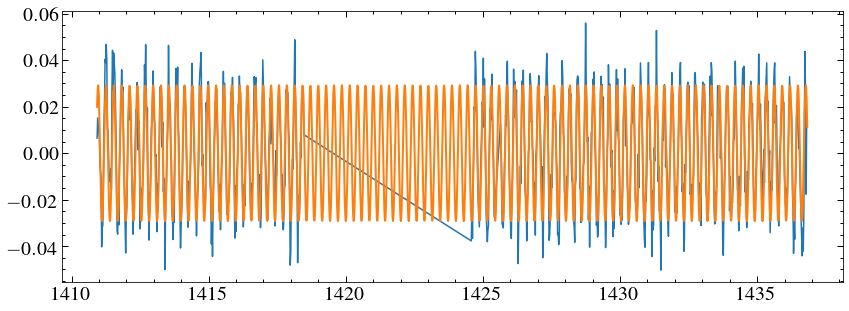

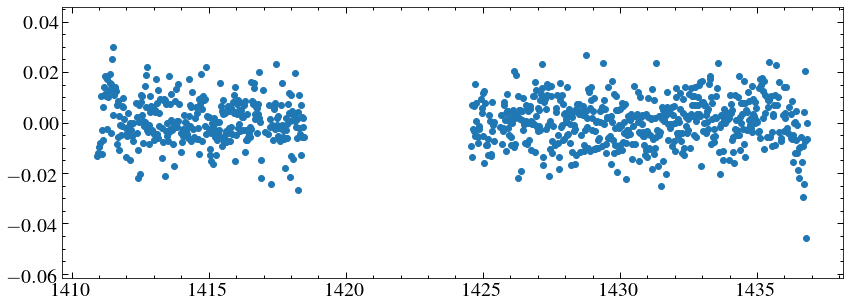

In [65]:
fitter = fitting.LevMarLSQFitter()


sin_mod =  models.Sine1D(amplitude=pg.max_power, frequency= pg.frequency_at_max_power.value)#, bounds={'phase':[0, 2*np.pi]})
sin_fit = fitter(sin_mod, lc1.time, lc1.flux, weights = 1/lc1.flux_err)
sin_fit_e = np.sqrt(np.diag(fitter.fit_info['param_cov']))
plt.plot(lc1.time, lc1.flux) 
timefit = np.linspace(lc1.time[0], lc1.time[-1], 2000)
plt.plot(timefit, sin_fit(timefit), c='C1', lw=2) 
print(sin_fit)
print(sin_fit_e)
plt.show()
plt.scatter(lc1.time, lc1.flux-sin_fit(lc1.time))

2.6725715626367403 d


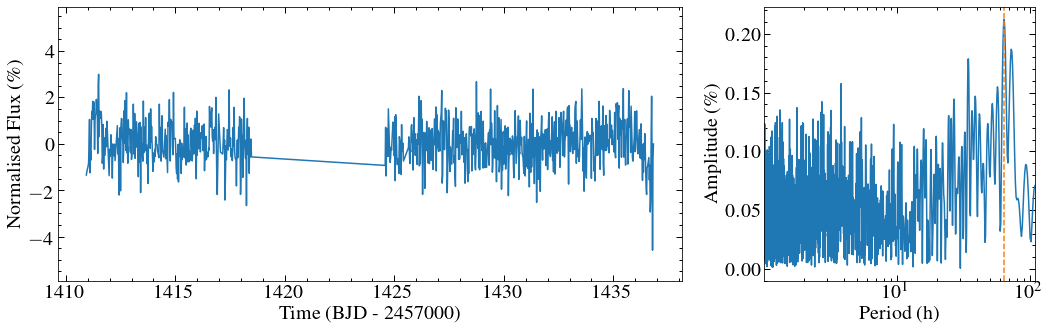

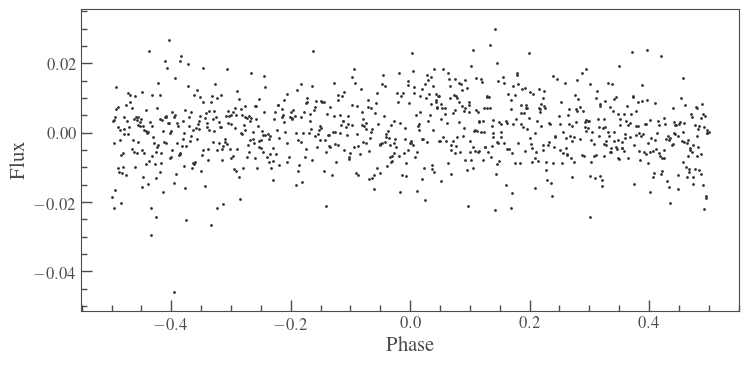

In [62]:
lc2 = lk.LightCurve(time = lc1.time, flux= lc1.flux-sin_fit(lc1.time), flux_err = lc1.flux_err)


pg2 = lc2.to_periodogram(oversample_factor=10,minimum_period=1*u.hour, maximum_period=10*u.day)
    
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, figure=fig)

plt.subplot(gs[:2])
plt.plot(lc2.time, (lc2.flux)*100)
plt.ylabel('Normalised Flux (\%)', size=20)
plt.xlabel('Time (BJD - 2457000)', size=20)
#plt.ylim(0.93, 1.07)
plt.ylim(-5.9, 5.9)

plt.subplot(gs[2:])
plt.plot(pg2.period.to(u.hour), pg2.power*100)
plt.xscale('log')
plt.ylabel('Amplitude (\%)', size=20)
plt.xlabel('Period (h)', size=20)
plt.xlim(1.01, 109)
#plt.annotate('P={0:10.2f}\n(known binary \n period :( )'.format(pg2.period_at_max_power.to(u.hour)), (10, 2.))
print(pg2.period_at_max_power)#.to(u.hour))
plt.axvline(pg2.period_at_max_power.to(u.hour).value, ls='--', c='C1')
plt.tight_layout()
plt.show()
lc2.fold(pg2.period_at_max_power).scatter()

Not really, no. But good to see we can find the period, worth getting all of the other stars?